In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import plotly.graph_objects as go
from matplotlib import font_manager,rc

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 폰트 이름 확인
from matplotlib import font_manager
f_path = 'c:/Windows/Fonts/malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Malgun Gothic'

In [4]:
# 한국어 설정
from matplotlib import font_manager, rc
rc("font",family ='Malgun Gothic')
%matplotlib inline

In [35]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_final_4.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 907
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          908 non-null    object 
 7   production_country  908 non-null    object 
 8   total_count         908 non-null    int64  
 9   total_rate          908 non-null    float64
 10  watchlist           908 non-null    int64  
 11  popularity          908 non-null    int64  
 12  user_review         908 non-null    int64  
 13  critic_review       908 non-null    int64  
 14  production          824 non-null    object 
 15  distributor         900 non-null    object 
 16  season_1     

In [6]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [36]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [37]:
# 시청 지속율 계산 함수
def calculate_retention_rate(season_data):
    episode_views = [ep[1] for ep in season_data.values() if isinstance(ep, (list, tuple))]
    if len(episode_views) > 1:
        initial_viewers = episode_views[0]
        final_viewers = episode_views[-1]
        retention_rate = (final_viewers / initial_viewers) * 100
    else:
        retention_rate = 100  # If there's only one episode, retention is 100%
    return retention_rate

# 시즌 1의 시청 지속율 계산
df['s1_retention_rate'] = df['season_1'].apply(calculate_retention_rate)

In [9]:
del df['season_3']
del df['season_4']
del df['season_5']
del df['season_6']
del df['season_7']
del df['season_8']
del df['season_9']
del df['season_10']
del df['season_11']
del df['season_12']
del df['season_13']
del df['season_14']
del df['season_15']
del df['season_16']
del df['season_17']


In [10]:
del df['imdb_title']
del df['imdb_url']

In [11]:
df_1 = df[df['total_season_num']==1]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 907
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        631 non-null    object 
 1   english_title       631 non-null    object 
 2   year                631 non-null    int64  
 3   total_season_num    631 non-null    int64  
 4   runtime             631 non-null    int64  
 5   genre               631 non-null    object 
 6   age_rating          631 non-null    object 
 7   production_country  631 non-null    object 
 8   total_count         631 non-null    int64  
 9   total_rate          631 non-null    float64
 10  watchlist           631 non-null    int64  
 11  popularity          631 non-null    int64  
 12  user_review         631 non-null    int64  
 13  critic_review       631 non-null    int64  
 14  production          559 non-null    object 
 15  distributor         625 non-null    object 
 16  season_1     

In [12]:
df_2 = df[df['total_season_num']>=2]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 1 to 887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        277 non-null    object 
 1   english_title       277 non-null    object 
 2   year                277 non-null    int64  
 3   total_season_num    277 non-null    int64  
 4   runtime             277 non-null    int64  
 5   genre               277 non-null    object 
 6   age_rating          277 non-null    object 
 7   production_country  277 non-null    object 
 8   total_count         277 non-null    int64  
 9   total_rate          277 non-null    float64
 10  watchlist           277 non-null    int64  
 11  popularity          277 non-null    int64  
 12  user_review         277 non-null    int64  
 13  critic_review       277 non-null    int64  
 14  production          265 non-null    object 
 15  distributor         275 non-null    object 
 16  season_1     

# 관심 유지도

In [13]:
# Box Plot 시각화
fig = go.Figure()

# df_1 Box Plot
fig.add_trace(go.Box(
    y=df_1['s1_retention_rate'],
    name='Season 1 Only',
    boxpoints='all',  # 'outliers', 'suspectedoutliers', or False
    jitter=0.3,       # Spread the points horizontally
    pointpos=-1.8     # Offset points to the left of the box
))

# df_2 Box Plot
fig.add_trace(go.Box(
    y=df_2['s1_retention_rate'],
    name='Season 2+',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# df Box Plot (Combined DataFrame)
fig.add_trace(go.Box(
    y=df['s1_retention_rate'],
    name='Combined',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# 레이아웃 설정
fig.update_layout(
    title='Retention Rate Comparison for Different Drama Types',
    xaxis_title='Drama Type',
    yaxis_title='Retention Rate (%)',
    showlegend=False
)

# 그래프 보여주기
fig.show()

In [14]:
top_10_retention_rates = df_2.sort_values(by='s1_retention_rate', ascending=False).head(10)
print(top_10_retention_rates[['korean_title','s1_retention_rate']])

    korean_title  s1_retention_rate
59        길모어 걸스         561.224490
223        진실의 늪         214.893617
9            플래시         135.416667
670       시크릿 위치         127.272727
25        굿 플레이스         126.666667
54           덱스터         118.181818
370  굿 키즈 온 더 블록         116.743119
352   루머의 루머의 루머         112.658228
180  원 데이 앳 어 타임         106.239737
46         블랙 미러         103.174603


- Season 2+ 이상치는 https://www.imdb.com/title/tt0238784/episodes/?ref_=tt_eps_sm

In [15]:
# total
sum(df['s1_retention_rate'])/len(df['s1_retention_rate'])

74.44600314444634

In [16]:
# season 1 only
sum(df_1['s1_retention_rate'])/len(df_1['s1_retention_rate'])

73.62436308747557

In [17]:
# season 2+
sum(df_2['s1_retention_rate'])/len(df_2['s1_retention_rate'])

76.31768139696831

- 어떤 그래프로?

## age_rating

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\3669168911.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



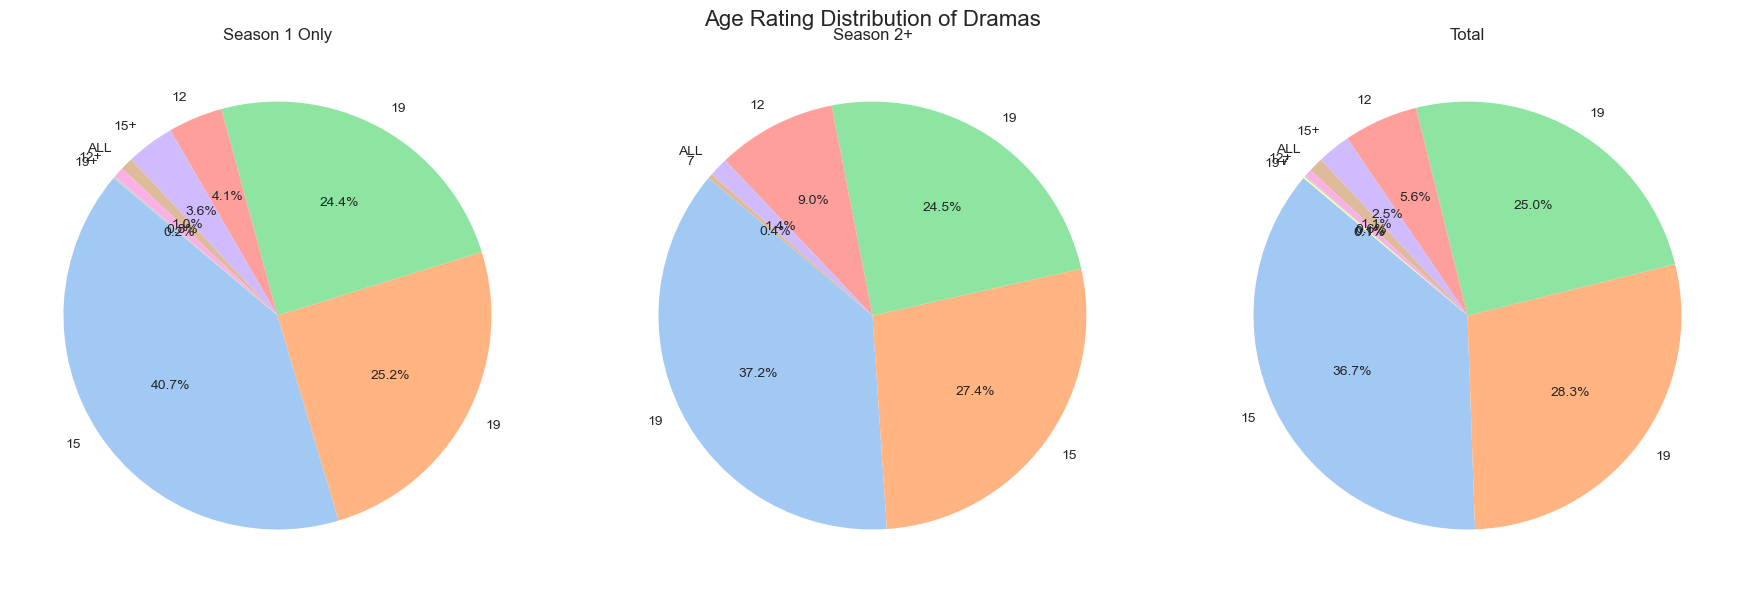

In [18]:
# 각 데이터프레임에서 age_rating 값 별 드라마 수 계산
df_1_counts = df_1['age_rating'].value_counts()
df_2_counts = df_2['age_rating'].value_counts()
df_counts = df['age_rating'].value_counts()

# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# subplot 1
axes[0].pie(df_1_counts, labels=df_1_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[0].set_title('Season 1 Only')

# subplot 2
axes[1].pie(df_2_counts, labels=df_2_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title('Season 2+')

# subplot 3
axes[2].pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[2].set_title('Total')

# 전체 그래프의 제목 설정
fig.suptitle('Age Rating Distribution of Dramas', fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


- 'Season 2+'이 'Season 1 Only'보다 19세 비중이 더많은것으로 확인됨

## runtime

In [19]:
# runtime Box Plot 시각화
fig = go.Figure()

# runtime Box Plot
fig.add_trace(go.Box(
    y=df_1['runtime'],
    name='S1 Only - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df_2['runtime'],
    name='S2+ - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['runtime'],
    name='Total - Runtime',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

# 레이아웃 설정
fig.update_layout(
    title='Runtime Comparison for Different Drama Types',
    xaxis_title='Drama Type',
    yaxis_title='Runtime (minutes)',
    showlegend=True
)

# runtime 그래프 보여주기
fig.show()

- 시즌2개 이상인 드라마가 runtime이 적음

## year(개봉연도)

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\3064221348.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



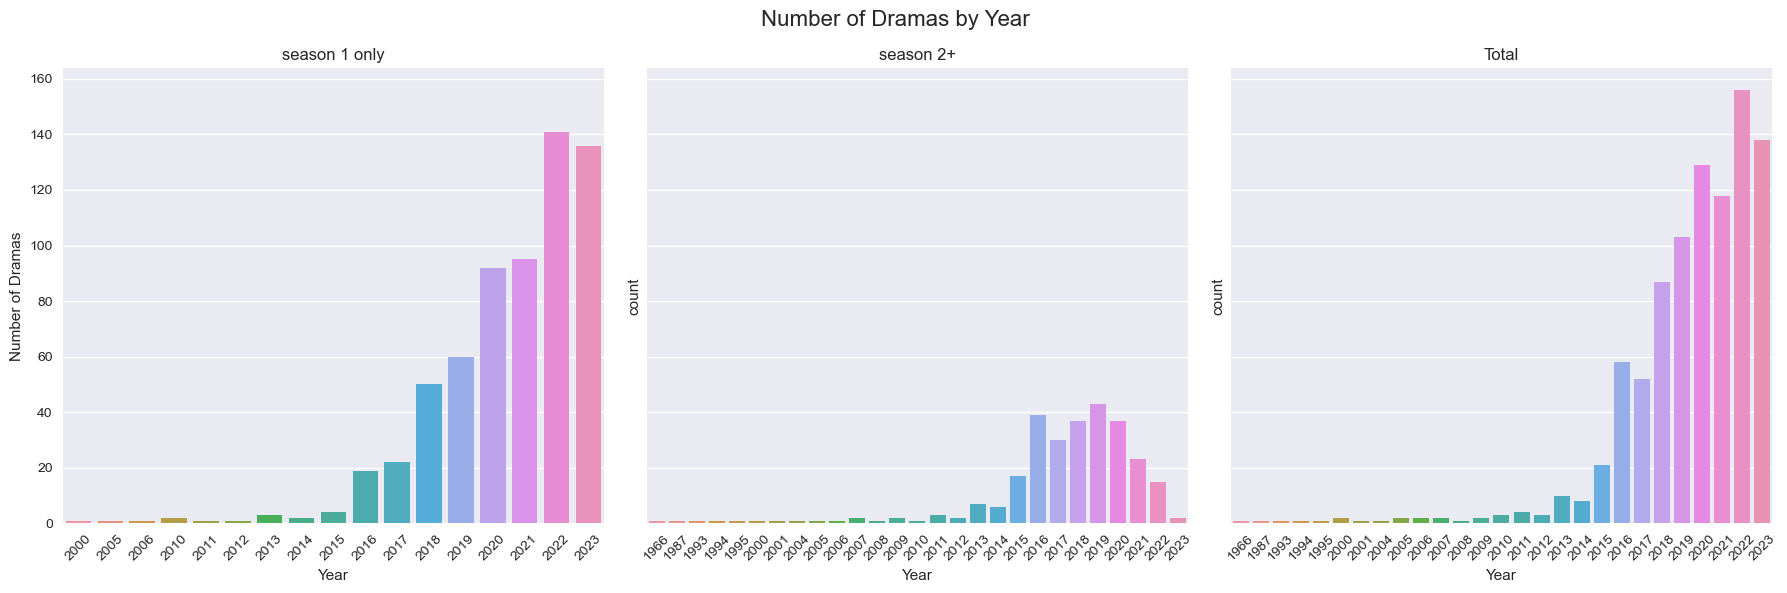

In [20]:
# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# subplot 1: df_1
plt.subplot(1, 3, 1)
sns.countplot(data=df_1, x='year', ax=axes[0])
axes[0].set_title('season 1 only')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Dramas')
axes[0].tick_params(axis='x', rotation=45)

# subplot 2: df_2
plt.subplot(1, 3, 2)
sns.countplot(data=df_2, x='year', ax=axes[1])
axes[1].set_title('season 2+')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=45)

# subplot 3: df
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='year', ax=axes[2])
axes[2].set_title('Total')
axes[2].set_xlabel('Year')
axes[2].tick_params(axis='x', rotation=45)

# 전체 그래프의 제목 설정
fig.suptitle('Number of Dramas by Year', fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

- 시즌2이상 만드는게 주춤해진듯?(실선그래프가 더 나으려나?)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          908 non-null    object 
 7   production_country  908 non-null    object 
 8   total_count         908 non-null    int64  
 9   total_rate          908 non-null    float64
 10  watchlist           908 non-null    int64  
 11  popularity          908 non-null    int64  
 12  user_review         908 non-null    int64  
 13  critic_review       908 non-null    int64  
 14  production          824 non-null    object 
 15  distributor         900 non-null    object 
 16  season_1     

- production_country EDA가 의미가 있을까 의문
- 넷플릭스 한국방영 기준이니 한국드라마가 많기에

## genre

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\593945958.py:27: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\593945958.py:48: UserWarning:

Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\593945958.py:48: UserWarning:

Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\593945958.py:48: UserWarning:

Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\593945958.py:48: UserWarning:

Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_12176\593945958.py:48: Us

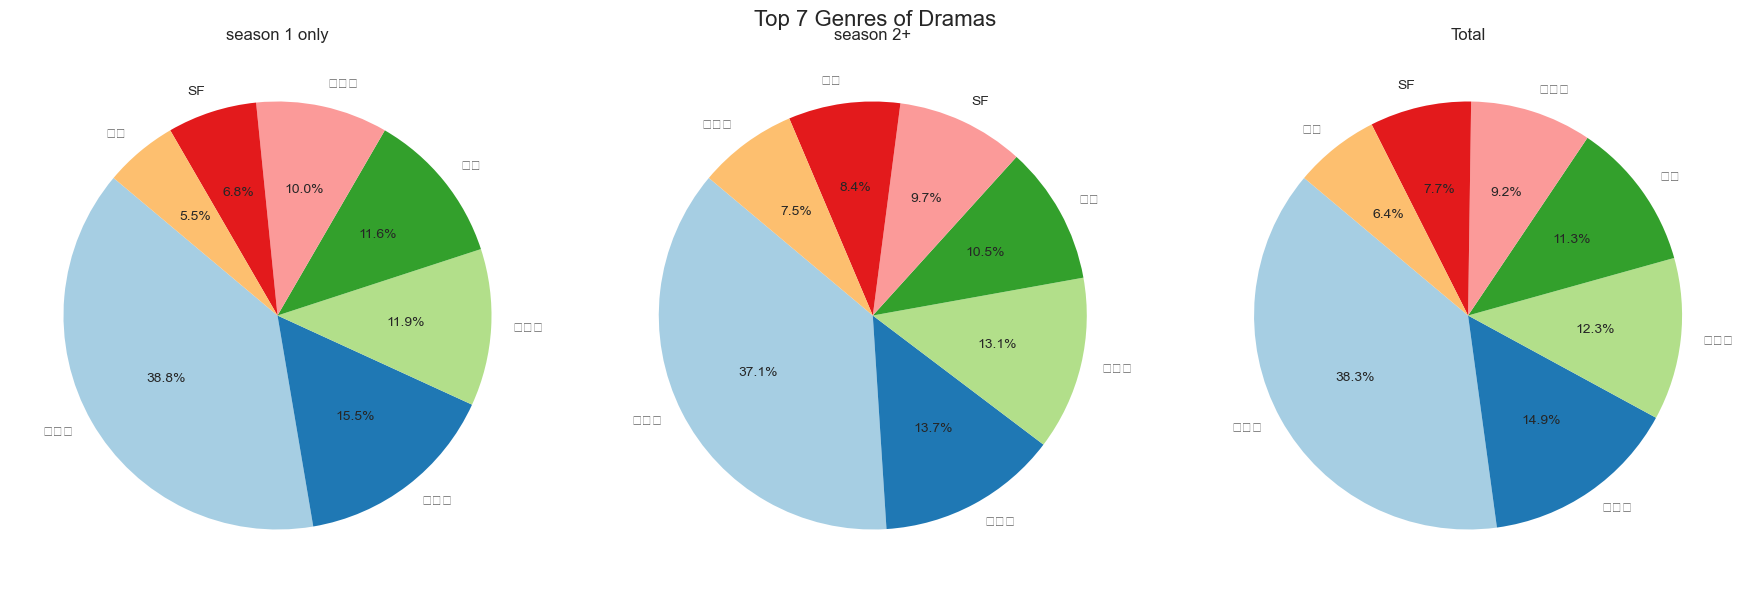

In [22]:
from collections import Counter
# 함수 정의
def get_top_genres(df, genre_column):
    genre_list = []
    for idx, row in df.iterrows():
        tmp_list = row[genre_column].split(', ')
        for x in tmp_list:
            genre_list.append(x.strip())  # 장르 문자열 앞뒤 공백 제거
    
    # 상위 7개 장르 선택
    counts = Counter(genre_list)
    top_genres = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:7]
    
    return top_genres

# 각 데이터프레임에서 상위 7개 장르 선택
top_genres_df = get_top_genres(df, 'genre')
top_genres_df_1 = get_top_genres(df_1, 'genre')
top_genres_df_2 = get_top_genres(df_2, 'genre')

# 상위 장르 데이터 추출
genres_df, cnt_df = zip(*top_genres_df)
genres_df_1, cnt_df_1 = zip(*top_genres_df_1)
genres_df_2, cnt_df_2 = zip(*top_genres_df_2)

# 그래프 스타일 설정
plt.style.use('seaborn')

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# subplot 1: df_1
axes[0].pie(cnt_df_1, labels=genres_df_1, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genres_df_1))))
axes[0].set_title('season 1 only')

# subplot 2: df_2
axes[1].pie(cnt_df_2, labels=genres_df_2, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genres_df_2))))
axes[1].set_title('season 2+')

# subplot 3: df
axes[2].pie(cnt_df, labels=genres_df, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genres_df))))
axes[2].set_title('Total')

# 전체 그래프의 제목 설정
plt.suptitle('Top 7 Genres of Dramas', fontsize=16)

# 그래프 출력
plt.tight_layout()
plt.show()

In [23]:
# 장르
genre = []
for idx, row in df.iterrows():
    tmp_list= row['genre'].split(', ')
    for x in tmp_list:
        genre.append(x)

counts = Counter(genre)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[1:]:
    print(f'{element}: {count}')

스릴러: 354
코미디: 291
범죄: 267
로맨스: 218
SF: 182
액션: 153
판타지: 127
공포: 75
역사: 53
가족: 39
전쟁: 29
Made in Europe: 20
음악: 19
스포츠: 12
서부: 5


In [24]:
# 장르
genre = []
for idx, row in df_2.iterrows():
    tmp_list= row['genre'].split(', ')
    for x in tmp_list:
        genre.append(x)

counts = Counter(genre)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[1:]:
    print(f'{element}: {count}')

스릴러: 102
코미디: 98
범죄: 78
SF: 72
액션: 63
로맨스: 56
판타지: 39
공포: 24
가족: 20
Made in Europe: 13
역사: 13
전쟁: 10
음악: 4
스포츠: 2
서부: 2


- 아니 한글 폰트 뭐가 문젠지 모르겠는데...
- 시즌2이상 드라마는 로맨스 장르의 비중이 평균보다 낮음

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          908 non-null    object 
 7   production_country  908 non-null    object 
 8   total_count         908 non-null    int64  
 9   total_rate          908 non-null    float64
 10  watchlist           908 non-null    int64  
 11  popularity          908 non-null    int64  
 12  user_review         908 non-null    int64  
 13  critic_review       908 non-null    int64  
 14  production          824 non-null    object 
 15  distributor         900 non-null    object 
 16  season_1     

---

In [26]:
# 모든 시즌에 대해서 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=2):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        # 평균 계산
        df[avg_rating_col] = df[season_col].apply(
            lambda x: sum([float(ep[0]) for ep in x.values()]) / len(x) if x else None
        )
        df[avg_views_col] = df[season_col].apply(
            lambda x: sum([int(ep[1]) for ep in x.values()]) / len(x) if x else None
        )

# 모든 시즌에 대해 변환 및 평균 계산
process_seasons(df)

# 변환된 데이터프레임 출력
print(df)

                korean_title                      english_title  year  \
0                     오징어 게임                         Squid Game  2021   
1                   12인의 심판자                         The Twelve  2019   
2                     희생자 게임                  The Victims' Game  2020   
3         스위트 투스: 사슴뿔을 가진 소년                        Sweet Tooth  2021   
4                       스위트홈                         Sweet Home  2020   
..                       ...                                ...   ...   
903                      레일라                              Leila  2019   
904              100만 엔의 여인들                  Million Yen Women  2017   
905                  킬러 코미디언                            Hasmukh  2020   
906                       달러                             Dollar  2019   
907  엘리트들, 못다 한 이야기: 나디아 구스만  Elite Short Stories: Nadia Guzmán  2021   

     total_season_num  runtime                      genre age_rating  \
0                   1       55               액션, 드라

In [27]:
# df의 각 행에 대해 조건을 체크하고 drama_type 컬럼에 값을 할당
df['drama_type'] = np.where(df['total_season_num'] == 1, 'Season 1 Only', 'Season 2+')

In [28]:
df_int = df[['year','total_season_num','runtime','total_count','total_rate','watchlist','popularity','user_review','critic_review',
            's1_retention_rate','s1_avg_rating','s1_avg_views','s2_avg_rating','s2_avg_views']]

In [29]:
# plt.figure(figsize=(12,6))
# sns.pairplot(data=df_int);

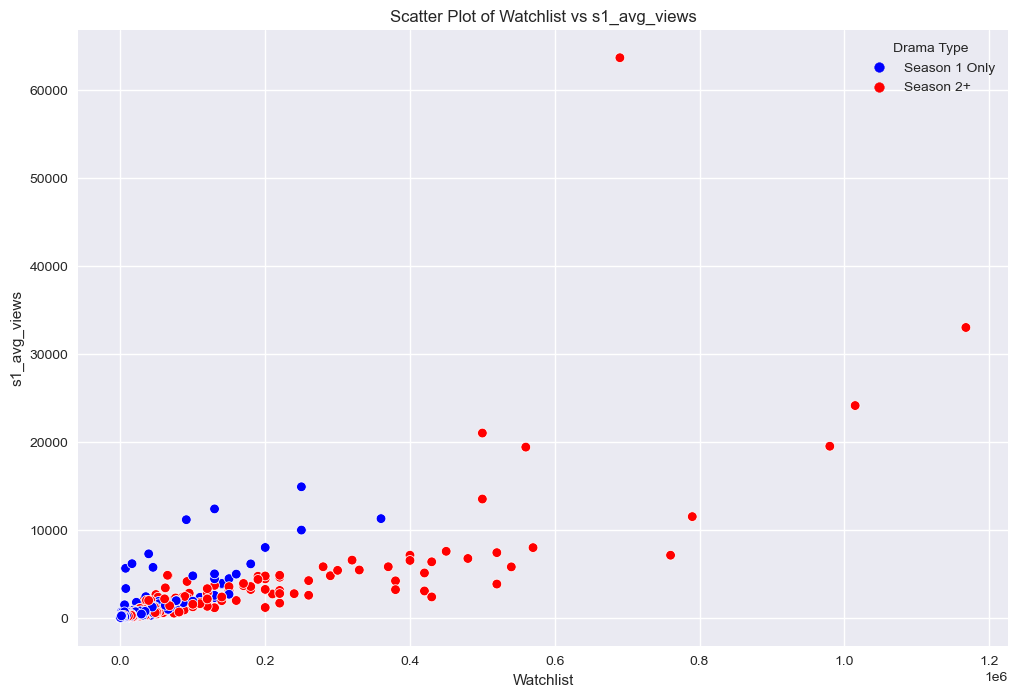

In [30]:
# 그래프 생성
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='watchlist', y='s1_avg_views', hue='drama_type', palette={'Season 1 Only': 'blue', 'Season 2+': 'red'})
plt.title('Scatter Plot of Watchlist vs s1_avg_views')
plt.xlabel('Watchlist')
plt.ylabel('s1_avg_views')
plt.legend(title='Drama Type')
plt.show()

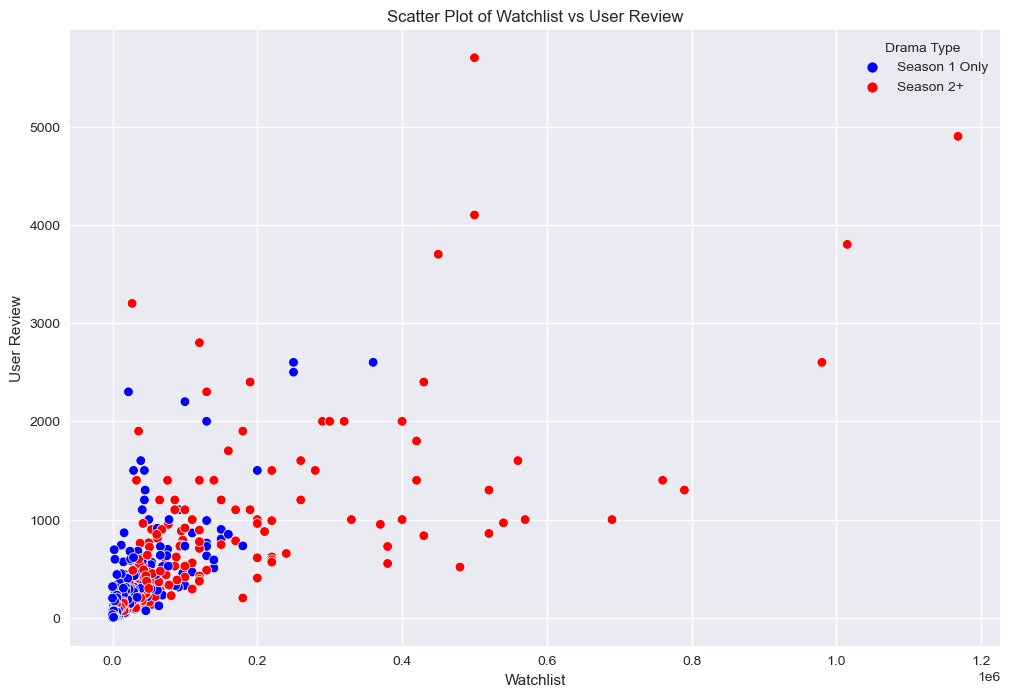

In [31]:
# 그래프 생성
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='watchlist', y='user_review', hue='drama_type', palette={'Season 1 Only': 'blue', 'Season 2+': 'red'})
plt.title('Scatter Plot of Watchlist vs User Review')
plt.xlabel('Watchlist')
plt.ylabel('User Review')
plt.legend(title='Drama Type')
plt.show()

---

In [ ]:
# 파일을 다시 불러와서 해야됨

In [38]:
# 모든 시즌에 대해서 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=17):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        # 평균 계산
        df[avg_rating_col] = df[season_col].apply(
            lambda x: sum([float(ep[0]) for ep in x.values()]) / len(x) if x else None
        )
        df[avg_views_col] = df[season_col].apply(
            lambda x: sum([int(ep[1]) for ep in x.values()]) / len(x) if x else None
        )

# 모든 시즌에 대해 변환 및 평균 계산
process_seasons(df)

# 변환된 데이터프레임 출력
print(df)

                korean_title                      english_title  year  \
0                     오징어 게임                         Squid Game  2021   
1                   12인의 심판자                         The Twelve  2019   
2                     희생자 게임                  The Victims' Game  2020   
3         스위트 투스: 사슴뿔을 가진 소년                        Sweet Tooth  2021   
4                       스위트홈                         Sweet Home  2020   
..                       ...                                ...   ...   
903                      레일라                              Leila  2019   
904              100만 엔의 여인들                  Million Yen Women  2017   
905                  킬러 코미디언                            Hasmukh  2020   
906                       달러                             Dollar  2019   
907  엘리트들, 못다 한 이야기: 나디아 구스만  Elite Short Stories: Nadia Guzmán  2021   

     total_season_num  runtime                      genre age_rating  \
0                   1       55               액션, 드라

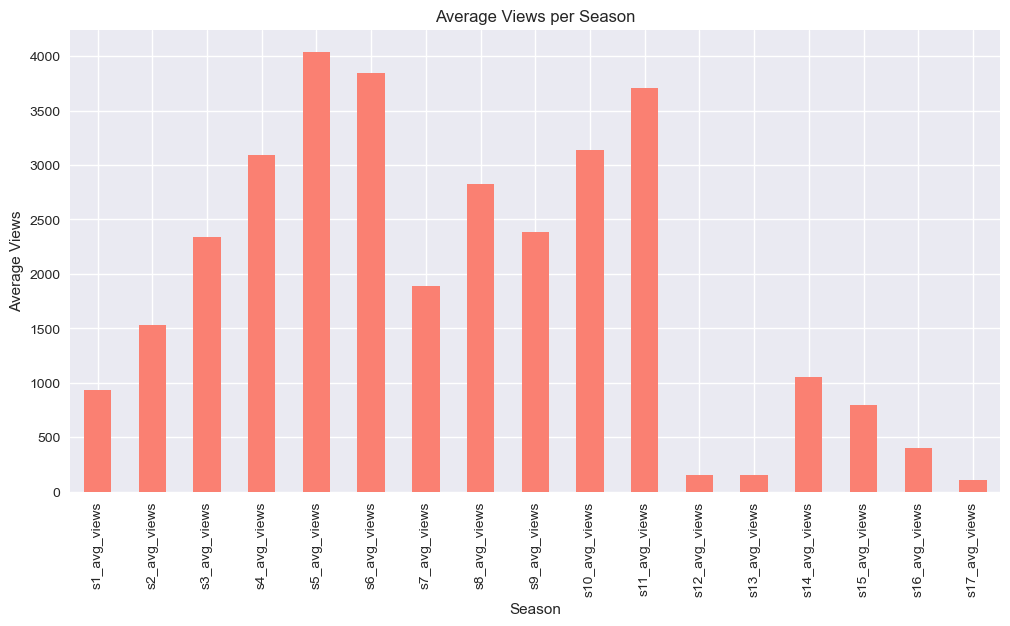

In [39]:
# 시즌별 평균 조회수 비교
avg_views_columns = [col for col in df.columns if 'avg_views' in col]
avg_views = df[avg_views_columns].mean()

plt.figure(figsize=(12, 6))
avg_views.plot(kind='bar', color='salmon')
plt.title('Average Views per Season')
plt.xlabel('Season')
plt.ylabel('Average Views')
plt.show()

In [32]:
# boxplot watchlist userrivew 같은 컬럼 이상치 체크

In [33]:
# 흥행지표 정규 분포에 있는지 체크?

In [34]:
# 흥행지표 개봉연도 시계열분포?